<a href="https://colab.research.google.com/github/lcbjrrr/quant/blob/master/3_Modelo_de_3_Equacoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelo de 3 Equacoes

**Curva IS**
$$
\begin{aligned}
y &=k\left(c_{0}+a_{0}+G\right)-k a_{1} \color{red} r \\
&=A-a \color{red}r
\end{aligned}
$$
**Curva de Philips**
$$
\pi_{t}=\pi_{t-1}+\alpha\left(y_{t}-y_{e}\right)
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

k=0.9
c0=0.6 
a0=1
a1=1
G=0

AA = k*(c0+a0+G) 
aa = k*a1

def IS(rate, A_, a_, chq=0):
  return A_ - a_*rate + chq

def _IS(y,A_,a_,chq=0):
  return (A_ + chq - y)/a_ 


def PI(y_t,y_e, pi_tmenos1,a):
  return pi_tmenos1 + a*(y_t - y_e)

def _PI(pi_tmenos1,pi_t,y_e,a):
  return (pi_tmenos1 - pi_t - a*y_e ) / a


##MR - Monetary Rule
$$
\left(y_{t}-y_{e}\right)=-\alpha \beta\left(\pi_{t}-\pi^{T}\right)
$$

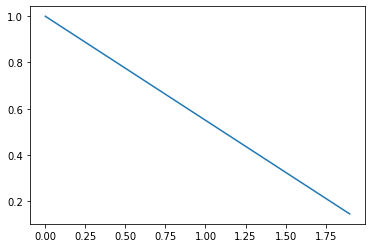

In [ ]:
def MR(pi_t , piT, y_e, a, b):
  return  -1 * a * b * (pi_t - piT) + y_e

pi_ts = np.arange(0,2,0.1)

plt.plot(pi_ts, MR(pi_ts,piT=0,y_e=1,a=0.5, b=0.9))


##Resolucao de Sistema de Equacões Lineares com 2 equacoes e duas incógnitas

Seja $A$
$$
A = \left[
\begin{array}{cc}
a_{11} & a_{12}  \\
a_{21} & a_{22} \\
\end{array}
\right],
$$
podemos encontrar a matriz inversa $A^{-1}$,
$$
\left[A|I\right] = \left[
\begin{array}{cc|cc}
a_{11} & a_{12}&1&0  \\
a_{21} & a_{22}&0&1 \\
\end{array}
\right],
$$
realizando as seguintes operações $L_2\sim L_2-\frac{a_{21}}{a_{11}}L_1$
$$
\left[A|I\right] = \left[
\begin{array}{cc|cc}
a_{11} & a_{12}&1&0 \\
0 & a_{22}-\frac{a_{21}a_{a12}}{a_{11}} &-\frac{a_{21}}{a_{11}}&1 \\
\end{array}
\right],
$$
$L_1\sim \frac{L_1}{a_{11}}$
$$
\left[A|I\right] = \left[
\begin{array}{cc|cc}
 1& \frac{a_{12}}{a_{11}}&\frac{1}{a_{11}}&0  \\
0 & \frac{a_{11} a_{22}-a_{21}a_{12}}{a_{11}} &-\frac{a_{21}}{a_{11}}&1 \\
\end{array}
\right],
$$
$L_1\sim L_1-\frac{a_{21}}{a_{22}}L2$
$$
\left[A|I\right] = \left[
\begin{array}{cc|cc}
 1& 0  &\frac{a_{22}}{a_{11}a_{22}-a_{21}a_{12}}&-\frac{a_{12}}{a_{11}a_{22}-a_{21}a_{12}}   \\
0 & \frac{a_{11} a_{22}-a_{21}a_{12}}{a_{11}} &-\frac{a_{21}}{a_{11}}&1 \\
\end{array}
\right],
$$
$L_2\sim \frac{L_2}{a_{22}}$
$$
\left[I|A^{-1}\right] = \left[
\begin{array}{cc|cc}
 1& 0  &\frac{a_{22}}{a_{11}a_{22}-a_{21}a_{12}}&-\frac{a_{12}}{a_{11}a_{22}-a_{21}a_{12}}   \\
0 & 1&-\frac{a_{21}}{a_{11} a_{22}-a_{21}a_{12}}&\frac{a_{11}}{a_{11} a_{22}-a_{21}a_{12}} \\
\end{array}
\right].
$$

Definindo assim,
$$
A^{-1} = \frac{1}{a_{11} a_{22}-a_{21}a_{12}}\left[
\begin{array}{cc}
a_{22} & -a_{12}  \\
-a_{21} & a_{11} \\
\end{array}
\right],
$$
sendo determinante $|A|=a_{11}a_{22}-a_{21}a_{12}$, reescrevemos a matriz inversa
$$
A^{-1} = \frac{1}{|A|}\left[
\begin{array}{cc}
a_{22} & -a_{12}  \\
-a_{21} & a_{11} \\
\end{array}
\right].
$$



In [ ]:
#print(y2)

In [ ]:
##Resolucao de Sistema de Equacoes Linenares com 2 equacoes

def solve_eq_linear(y0,pi,pi_0,a,b):  
  A = np.array([ [-a1,], 
              [ a*b,1] ])
  B = np.array([pi-a*y0,y0+pi_0*a*b ])
  S= np.linalg.solve(A,B)
  return (S[1],S[0])

# Resumo - Modelo de três equações
**1- Função perda do banco central**
\begin{equation}
\begin{aligned}
L(\pi, y) &= (y_t-y_e)^2+(\pi_t-\pi^T)^2
\end{aligned}\tag{Eq. de perda do banco central}
\end{equation}
**2- Curva de Philips**
\begin{equation}
\begin{aligned}
\pi_{t}&=\pi_{t-1}+\alpha\left(y_{t}-y_{e}\right)
\end{aligned}\tag{Curva de Phillips - PC}
\end{equation}
**3- Regra monetária**
\begin{equation}
\begin{aligned}
y_{t}-y_e&=-\alpha\beta(\pi_{t}-\pi^T)
\end{aligned}\tag{Regra monetária - MR}
\end{equation}
**4- Curva IS**
\begin{equation}
\begin{aligned}
y &=k\left(c_{0}+a_{0}+G\right)-k a_{1} r \\
&=A-a r
\end{aligned}\tag{Curva IS}
\end{equation}

# Parâmetros chaves

1) $\pi_t$ - inflação efetiva no período t,

2) $\pi^T$ - meta de inflação

3) $\beta$ - Preferência do banco central, determina o formato da funão perda.

4) $\alpha$ - Inclinação da curva de Phillips (PC), modificar a regra monetária (MR).

5) $a$ - Mostra a sensibilidade dos juros a demanda agregada. 

6) $y_t$ - produto no período t.

6) $y_e$ - Nível de equlíbrio do produto, modifica a regra monetária - produto potencial.

7) $r_s$ - Taxa de juros real estável.

#1- Função perda do banco central**
\begin{equation}
\begin{aligned}
L(\pi, y) &= (y_t-y_e)^2+(\pi_t-\pi^T)^2
\end{aligned}\tag{Eq. de perda do banco central}
\end{equation}
**2- Curva de Philips**
\begin{equation}
\begin{aligned}
\pi_{t}&=\pi_{t-1}+\alpha\left(y_{t}-y_{e}\right)
\end{aligned}\tag{Curva de Phillips - PC}
\end{equation}
**3- Regra monetária**
\begin{equation}
\begin{aligned}
y_{t}-y_e&=-\alpha\beta(\pi_{t}-\pi^T)
\end{aligned}\tag{Regra monetária - MR}
\end{equation}
**4- Curva IS**
\begin{equation}
\begin{aligned}
y &=k\left(c_{0}+a_{0}+G\right)-k a_{1} r \\
&=A-a r
\end{aligned}\tag{Curva IS}
\end{equation}


# A regra monetária e a regra de Taylor.
Escrevendo as equações para um período de tempo

**1- Função perda do banco central**
\begin{equation}
\begin{aligned}
L(\pi, y) &= (y_1-y_e)^2+(\pi_1-\pi^T)^2
\end{aligned}\tag{Eq. de perda do banco central}
\end{equation}
**2- Curva de Philips**
\begin{equation}
\begin{aligned}
\pi_1&=\pi_0+\alpha\left(y_1-y_{e}\right)
\end{aligned}\tag{Curva de Phillips - PC}
\end{equation}
**3- Regra monetária**
\begin{equation}
\begin{aligned}
y_1-y_e&=-\alpha\beta(\pi_1-\pi^T)
\end{aligned}\tag{Regra monetária - MR}
\end{equation}
**4- Curva IS**
\begin{equation}
\begin{aligned}
y_1 - y_e&=-a (r_0-r_s)
\end{aligned}\tag{Curva IS}
\end{equation}

Tomendo a regra monetária para um periodo, 
\begin{equation}
\begin{aligned}
y_1-y_e&=-\alpha\beta(\pi_1-\pi^T)
\end{aligned}\tag{Regra monetária para um periodo- MR}
\end{equation}
e substituindo a curva de Phillips, teremos
\begin{equation}
\begin{aligned}
y_1-y_e&=-\alpha\beta(\pi_0+\alpha\left(y_1-y_{e}\right)-\pi^T)\\
\frac{y_1-y_e}{-\alpha\beta}&=\pi_0+\alpha\left(y_1-y_{e}\right)-\pi^T\\
\frac{y_1-y_e}{-\alpha\beta}-\alpha\left(y_1-y_{e}\right)&=\pi_0-\pi^T\\
\end{aligned}
\end{equation}
logo, 
\begin{equation}
\begin{aligned}
-\left(\alpha+\frac{1}{\alpha\beta}\right)(y_1-y_{e})&=\pi_0-\pi^T\\
(y_1-y_{e})&=\frac{1}{-\left(\alpha+\frac{1}{\alpha\beta}\right)}(\pi_0-\pi^T)\\
\end{aligned}
\end{equation}
usando agora a útima equação
\begin{equation}
\begin{aligned}
y_1 - y_e&=-a (r_0-r_s)\\
\frac{1}{-\left(\alpha+\frac{1}{\alpha\beta}\right)}(\pi_0-\pi^T)&=-a (r_0-r_s)\\
\end{aligned}\tag{Curva IS}
\end{equation}
portanto,
\begin{equation}
\begin{aligned}
r_0-r_s&=\frac{1}{a\left(\alpha+\frac{1}{\alpha\beta}\right)}(\pi_0-\pi^T)\\
\end{aligned}\tag{Regra de Taylor}
\end{equation}

Se $a=\alpha=\beta=1$ então
\begin{equation}
\begin{aligned}
r_0-r_s&=0.5(\pi_0-\pi^T).\\
\end{aligned}
\end{equation}



## MR x PI

In [ ]:
#solve_eq_linear( y0=y0_p0, pi=pi_p0,pi_0=pi_p0,a=alfa, b=beta)

##Resolucao de Sistema de Equacoes Linenares com 2 equacoes (Corrigido)

In [ ]:
#Resolucao de Sistema de Equacoes Linenares com 2 equacoes
from scipy.optimize import fsolve

def pack_eq(f1,f2):
  return lambda x_y: ( x_y[1]-f1(x_y[0]), x_y[1]-f2(x_y[0]) )

def solve_eq_lin(f1, f2, dom=(0,1)):
  eqz = pack_eq(f1,f2)
  xi,yi=fsolve(eqz,dom)
  return (xi,yi)

In [ ]:
def PI_lambda(ye, pi_t_1,a):
  return lambda yt : PI(y_t=yt,y_e=ye, pi_tmenos1=pi_t_1,a=a)

def MR_lambda( piT, ye, a, b):
  return lambda pit : MR(pi_t=pit , piT=piT, y_e=ye, a=a, b=b)

def _MR(y_t , piT, y_e, a, b):
  return (y_t-y_e)/(-a*b) + piT

def lambda_MR(piT, ye, a, b):
  return lambda yt : _MR(y_t=yt , piT=piT, y_e=ye, a=a, b=b)



#Choque de Inflacao 

ye= 1.0 piT= 0.7
pi0= 1.45
rs= 0.48888888888888904
y1= 0.5254342431761786 pi1= 1.1652605459057073
r0= 1.0161841742486906


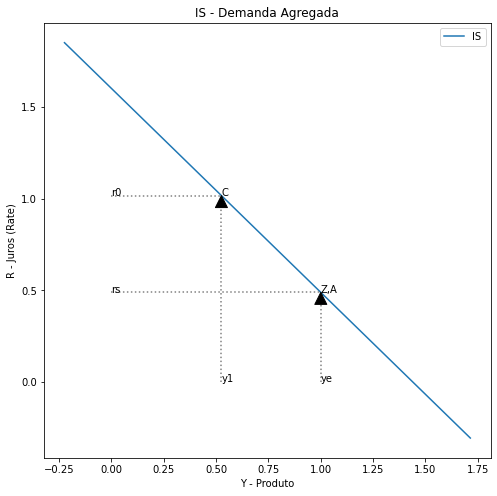

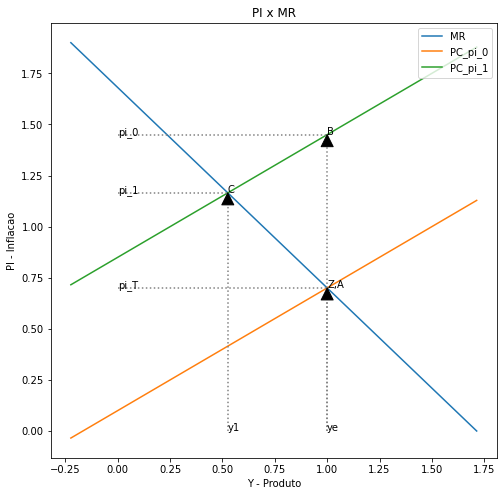

In [ ]:
import numpy as np

choque_pi = 0.75
beta=1.7
alfa=0.6
pi_p0=0.7
y0_p0=1

pi_ts = np.arange(0,2,0.1)

ys = np.array([])
for pi_t in pi_ts:
  ys=np.append(ys,MR(pi_t, pi_p0, y0_p0, alfa, beta) )
  
ye,piT= solve_eq_lin(PI_lambda(y0_p0, pi_p0,alfa),lambda_MR(pi_p0,y0_p0,alfa,beta),(0,2) )
pi0=piT+choque_pi
rs = _IS(ye,AA,aa)
print('ye=',ye,'piT=',piT)
print('pi0=',pi0)
print('rs=',rs)

#y1, pi1 = solve_eq_linear( y0=y0_p0, pi=pi0,pi_0=pi_p0,a=alfa, b=beta)
y1,pi1 = solve_eq_lin(PI_lambda(ye, pi0,alfa),lambda_MR(pi_p0,y0_p0,alfa,beta),(0,2) )
r0 = _IS(y1,AA,aa)
print('y1=',y1,'pi1=',pi1)
print('r0=',r0)


plt.figure(figsize=(8,8))
plt.plot(ys,_IS(ys,AA,aa) , label = 'IS')
plt.plot([ye,ye], [0,rs],linestyle=':', color='grey')
plt.plot([0,ye], [rs,rs],linestyle=':', color='grey')
plt.plot([y1,y1], [0,r0],linestyle=':', color='grey')
plt.plot([0,y1], [r0,r0],linestyle=':', color='grey')
plt.title('IS - Demanda Agregada')
plt.ylabel('R - Juros (Rate)')
plt.xlabel('Y - Produto')
plt.legend(loc='upper right')
plt.annotate('ye', xy=(ye, 0), xytext=(ye,0))
plt.annotate('y1', xy=(y1, 0), xytext=(y1,0))
plt.annotate('rs', xy=(0, rs), xytext=(0,rs))
plt.annotate('r0', xy=(0, r0), xytext=(0,r0))
plt.annotate('Z,A', xy=(ye, rs), xytext=(ye, rs), arrowprops={'facecolor':'black'})
plt.annotate('C', xy=(y1, r0), xytext=(y1, r0), arrowprops={'facecolor':'black'})
plt.show()

plt.figure(figsize=(8,8))
plt.plot(ys,pi_ts, label='MR')
plt.plot(ys,PI(ys,y0_p0, pi_p0,alfa) , label = 'PC_pi_0')
plt.plot(ys,PI(ys,ye, pi0,alfa) , label = 'PC_pi_1')
plt.plot([ye,ye], [0,piT],linestyle=':', color='grey')
plt.plot([0,ye], [piT,piT],linestyle=':', color='grey')
plt.plot([ye,ye], [0,pi0],linestyle=':', color='grey')
plt.plot([0,ye], [pi0,pi0],linestyle=':', color='grey')
plt.plot([y1,y1], [0,pi1],linestyle=':', color='grey')
plt.plot([0,y1], [pi1,pi1],linestyle=':', color='grey')
plt.title('PI x MR')
plt.ylabel('PI - Inflacao')
plt.xlabel('Y - Produto')
plt.legend(loc='upper right')
plt.annotate('ye', xy=(ye, 0), xytext=(ye,0))
plt.annotate('y1', xy=(y1, 0), xytext=(y1,0))
plt.annotate('pi_T', xy=(0, piT), xytext=(0,piT))
plt.annotate('pi_1', xy=(0, pi1), xytext=(0,pi1))
plt.annotate('pi_0', xy=(0, pi0), xytext=(0,pi0))
plt.annotate('Z,A', xy=(ye, piT), xytext=(ye, piT), arrowprops={'facecolor':'black'})
plt.annotate('B', xy=(ye, pi0), xytext=(ye, pi0), arrowprops={'facecolor':'black'})
plt.annotate('C', xy=(y1, pi1), xytext=(y1, pi1), arrowprops={'facecolor':'black'})
plt.show()

In [ ]:
def np_fib(qtd):
  f = np.array([1,2])
  #f = np.array([])
  for i in range(2,qtd):
  #for i in range(1,qtd):
    f= np.append(f, f[i-1] + f[i-2])
    #f= np.append(f, i**4)
    #f= np.append(f, i**2)
  return f

np_fib(5)


array([1, 2, 3, 5, 8])

##Funcao Resposta


[0.7        0.7        0.7        1.45       1.45       1.33
 1.21       1.16526055 0.96918211 0.77310368 0.7        0.7       ]
[0.01 0.02 0.03 0.05 0.08 0.13 0.21 0.34 0.55 0.89 1.44 2.33]


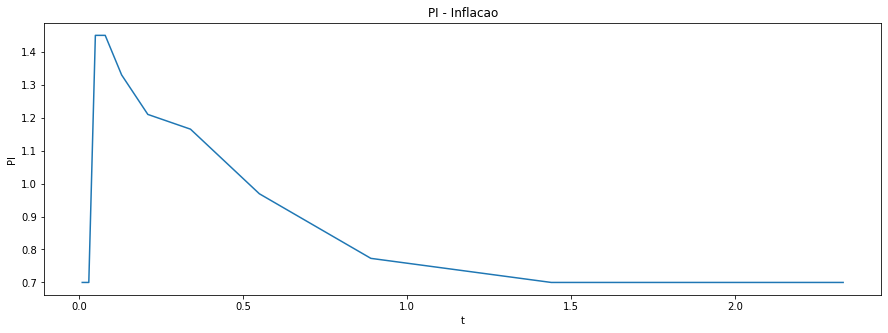

[1.         1.         1.         0.52543424 0.62743424 0.72943424
 0.83143424 0.93343424 1.         1.        ]
[0.01 0.02 0.03 0.05 0.08 0.13 0.21 0.34 0.55 0.89]


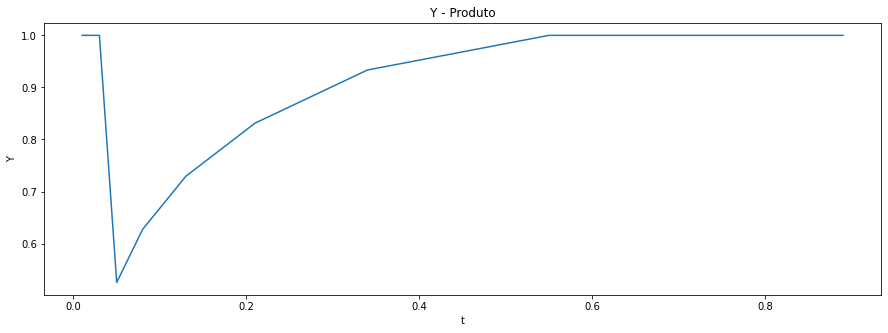

--- 0.5254342431761786 1.0
[0.62543424 0.72543424 0.82543424 0.92543424]
[0.90507306 0.79396195 0.68285084 0.57173973]
[0.48888889 0.48888889 0.48888889 1.01618417 0.90507306 0.79396195
 0.68285084 0.57173973 0.48888889 0.48888889]
[0.01 0.02 0.03 0.05 0.08 0.13 0.21 0.34 0.55 0.89]


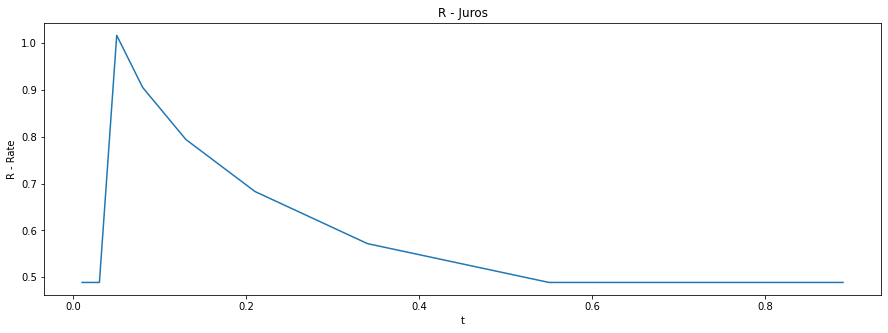

In [ ]:
import matplotlib.pyplot as plt

# PI - funcao resposta
pis= np.array([])
yy = np.arange(ye,y1, -0.2) 
for y in yy:
  pi=PI(y,ye, pi0,alfa) 
  pis=np.append(pis, pi ) 

yy = np.arange(y1,ye, 0.2) 
for y in yy:
  pi=_MR(y, pi_p0, y0_p0, alfa, beta)
  pis=np.append(pis, pi ) 

pis=np.append(pis, np.repeat(piT,2))
pix = np.append(np.repeat(piT,3) , np.array([pi0]) )
pis = np.append(pix, pis) 
print(pis)
ts= np_fib(len(pis)) /100
print(ts)
plt.figure(figsize=(15,5))
plt.plot(ts,pis )
plt.title('PI - Inflacao')
plt.ylabel('PI')
plt.xlabel('t')
plt.show()


# Y - funcao resposta
ys= np.array([])
pis = np.arange(pi1-0.1,piT, -0.1) 
for pi in pis:
  y=MR(pi,piT,ye,alfa,beta)
  ys=np.append(ys, y ) 
ts = np.append(np.array([]),  range(0,len(ys))  )
ys=np.append(ys, np.repeat(ye,2))
yx = np.append(np.repeat(ye,3) , np.array([y1]) )
ys = np.append(yx, ys) 
print(ys)
ts= np_fib(len(ys)) /100
print(ts)
plt.figure(figsize=(15,5))
plt.plot(ts,ys )
plt.title('Y - Produto')
plt.ylabel('Y')
plt.xlabel('t')
plt.show()

# R (Rate) - funcao resposta
print('---',y1,ye)
ers= np.array([])
yy = np.arange(y1+0.1,ye, 0.1) 
print(yy)
for y in yy:
  r=_IS(y,AA,aa) 
  ers=np.append(ers, r ) 
print(ers)
ers=np.append(ers, np.repeat(rs,2))
rx = np.append(np.repeat(rs,3) , np.array([r0]) )
ers = np.append(rx, ers) 
ts= np_fib(len(ers)) /100
print(ers)
print(ts)
plt.figure(figsize=(15,5))
plt.plot(ts,ers )
plt.title('R - Juros')
plt.ylabel('R - Rate')
plt.xlabel('t')
plt.show()


In [ ]:
piT

0.7

In [ ]:
y1

0.5254342431761786

##Livro

![alt text](https://pbs.twimg.com/media/EbMe7haXQAEnRpP?format=png&name=large)

##Rascunho


![texto alternativo](https://pbs.twimg.com/media/EbPOA1QXkAE6N1U?format=jpg&name=4096x4096)

![texto alternativo](https://github.com/anderborba/aula_ibmec/raw/master/loss_function_1.jpg)


![texto alternativo](https://github.com/anderborba/aula_ibmec/raw/master/loss_function_2.jpg)

![texto alternativo](https://github.com/anderborba/aula_ibmec/raw/master/loss_function_3.jpg)

In [ ]:
#def fmr(cte):
#  def mr(y):
#    return -y + cte
#  return mr

#def fpc(cte):
#  def pc(y):
#    return y + cte
#  return pc

#def eqqz(p):
#  x,y=p
#  f_mr = fmr(2)
#  f_pc = fpc(0.2)
#  return (y-f_mr(x) , y-f_pc(x))

#xxx,yyy=fsolve(eqqz,(1,1))
#print(xxx,yyy)

#yyy = np.arange(0,2,0.1)
#plt.plot(yyy, mr(yyy))
#plt.plot(yyy, pc(yyy))
#plt.show()

 

#print(solve_eq_lin(mr,pc,(0,2)))

#A = np.array([ [1,1],
#              [1,-1] ])
#B = np.array([ 2,0.2 ])
#np.linalg.solve(A,B)


In [ ]:

def empacota(ye, pi_t_1,a,piT, b):

  def PI_l(y_t):
      return pi_t_1 + a*(y_t - ye)

  def l_MR(y_t):
    return (y_t-ye)/(-a*b) + piT
  
  def eqq(p):
    x,y = p
    return ( y-PI_l(x),y-l_MR(x) )

  return eqq

def resolve_PIvsMR(ye, pi_t_1,a,piT, b, chute=(0,1)):
  eqz = empacota(ye, pi_t_1,a,piT, b)
  xi,yi=fsolve(eqz,chute)
  return (xi,yi)

print(resolve_PIvsMR( y0_p0, pi_p0,alfa,pi_p0,beta))
resolve_PIvsMR( y0_p0, pi0,alfa,pi_p0,beta)


(1.0, 0.7)


(0.5254342431761786, 1.165260545905707)

In [ ]:
def calc(x,cte):
  def soma_cte(x,cte):
    return x + cte 
  return soma_cte(x,cte)

calc(10,1)

11

#Choque de Demanda


y0 1.55
pi0= 1.03
rs= 0.48888888888888904 y0= 1.55
y1= 0.7911910669975185 pi1= 0.9047146401985112
r0= 0.7208988144472018


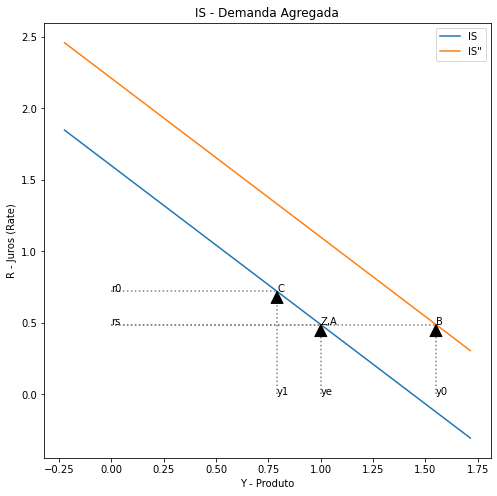

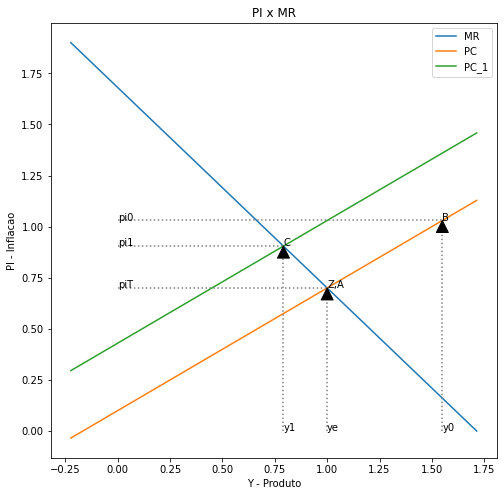

In [ ]:
choque_IS=0.55

beta=1.7
alfa=0.6
pi_p0=0.7
y0_p0=1

pi_T = pi_p0

yee=y0_p0
rs = _IS(yee,AA,aa)
y00=yee+choque_IS
print('y0',y00)
pi00 = PI(y00,yee,pi_T,a=alfa)
print('pi0=',pi00)

pi_ts = np.arange(0,2,0.1)

ys = np.array([])
for pi_t in pi_ts:
  ys=np.append(ys,MR(pi_t, pi_T,yee, alfa, beta) )

yy1,ppi1=solve_eq_lin(PI_lambda(yee,pi00,alfa),lambda_MR(pi_T,yee,alfa,beta) )
r00 = _IS(yy1,AA,aa)
print('rs=',rs,'y0=',y00)
print('y1=',yy1,'pi1=',ppi1)
print('r0=',r00)
plt.figure(figsize=(8,8))
plt.plot(ys,_IS(ys,AA,aa) , label = 'IS')
plt.plot(ys,_IS(ys,AA,aa,choque_IS) , label = 'IS"')
plt.plot([yee,yee], [0,rs],linestyle=':', color='grey')
plt.plot([0,yee], [rs,rs],linestyle=':', color='grey')
plt.plot([0,y00], [rs,rs],linestyle=':', color='grey')
plt.plot([y00,y00], [0,rs],linestyle=':', color='grey')
plt.plot([yy1,yy1], [0,r00],linestyle=':', color='grey')
plt.plot([0,yy1], [r00,r00],linestyle=':', color='grey')
plt.title('IS - Demanda Agregada')
plt.ylabel('R - Juros (Rate)')
plt.xlabel('Y - Produto')
plt.legend(loc='upper right')
plt.annotate('ye', xy=(yee, 0), xytext=(yee,0))
plt.annotate('y0', xy=(y00, 0), xytext=(y00,0))
plt.annotate('y1', xy=(yy1, 0), xytext=(yy1,0))
plt.annotate('rs', xy=(0, rs), xytext=(0,rs))
plt.annotate('r0', xy=(0, r00), xytext=(0,r00))
plt.annotate('Z,A', xy=(yee, rs), xytext=(yee, rs), arrowprops={'facecolor':'black'})
plt.annotate('B', xy=(y00, rs), xytext=(y00, rs), arrowprops={'facecolor':'black'})
plt.annotate('C', xy=(yy1, r00), xytext=(yy1, r00), arrowprops={'facecolor':'black'})
plt.show()

plt.figure(figsize=(8,8))
plt.plot(ys,pi_ts, label='MR')
plt.plot(ys,PI(y_t=ys,y_e=yee, pi_tmenos1=pi_T,a=alfa) , label = 'PC')
plt.plot(ys,PI(y_t=ys,y_e=yee, pi_tmenos1=pi00,a=alfa) , label = 'PC_1')
plt.plot([yee,yee], [0,piT],linestyle=':', color='grey')
plt.plot([0,yee], [piT,piT],linestyle=':', color='grey')
plt.plot([y00,y00], [0,pi00],linestyle=':', color='grey')
plt.plot([0,y00], [pi00,pi00],linestyle=':', color='grey')
plt.plot([yy1,yy1], [0,ppi1],linestyle=':', color='grey')
plt.plot([0,yy1], [ppi1,ppi1],linestyle=':', color='grey')
plt.title('PI x MR')
plt.ylabel('PI - Inflacao')
plt.xlabel('Y - Produto')
plt.legend(loc='upper right')
plt.annotate('ye', xy=(yee, 0), xytext=(yee,0))
plt.annotate('y0', xy=(y00, 0), xytext=(y00,0))
plt.annotate('y1', xy=(yy1, 0), xytext=(yy1,0))
plt.annotate('piT', xy=(0, piT), xytext=(0,piT))
plt.annotate('pi1', xy=(0, ppi1), xytext=(0,ppi1))
plt.annotate('pi0', xy=(0, pi00), xytext=(0,pi00))
plt.annotate('Z,A', xy=(yee, piT), xytext=(yee, piT), arrowprops={'facecolor':'black'})
plt.annotate('B', xy=(y00, pi00), xytext=(y00, pi00), arrowprops={'facecolor':'black'})
plt.annotate('C', xy=(yy1, ppi1), xytext=(yy1, ppi1), arrowprops={'facecolor':'black'})
plt.show()

##Funcao Resposta

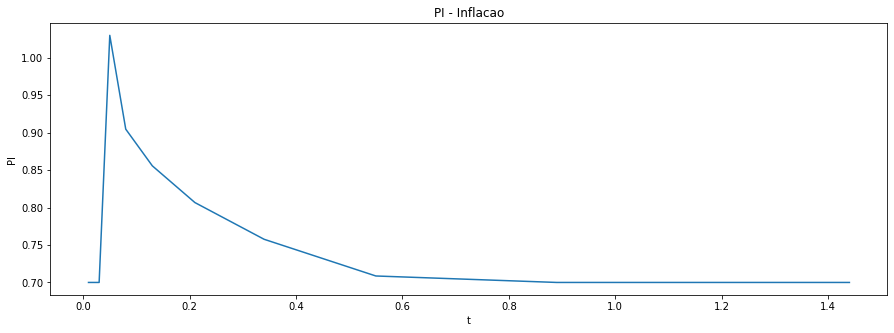

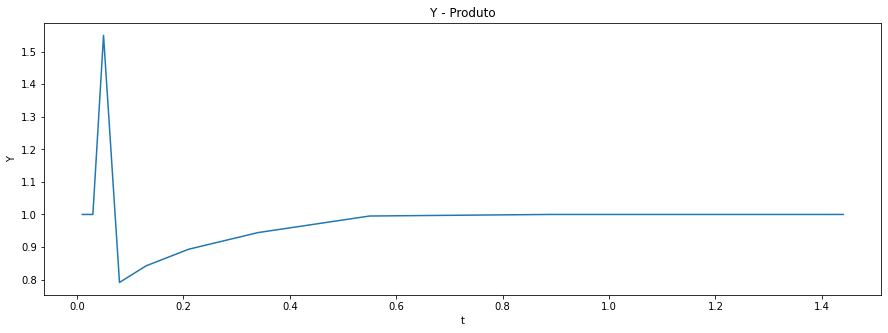

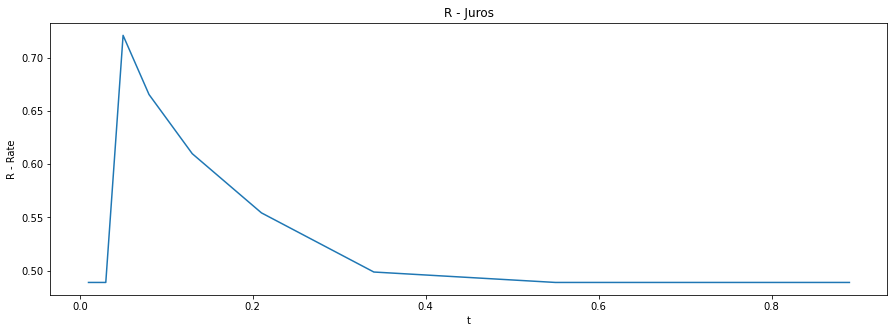

In [ ]:
import matplotlib.pyplot as plt

# PI - funcao resposta
pis= np.array([])
yy = np.arange(yy1,yee, 0.05) 
for y in yy:
  pi=_MR(y, pi_p0, y0_p0, alfa, beta)
  pis=np.append(pis, pi ) 

pis=np.append(pis, np.repeat(piT,2))
pix = np.append(np.repeat(piT,3) , np.array([pi00]) )
pis = np.append(pix, pis) 
ts= np_fib(len(pis)) /100
plt.figure(figsize=(15,5))
plt.plot(ts,pis )
plt.title('PI - Inflacao')
plt.ylabel('PI')
plt.xlabel('t')
plt.show()


# Y - Funcao resposta
ys= np.array([])
pis = np.arange(ppi1,piT, -0.05) 
for pi in pis:
  y=MR(pi,piT,yee,alfa,beta)
  ys=np.append(ys, y ) 
ts = np.append(np.array([]),  range(0,len(ys))  )
ys=np.append(ys, np.repeat(yee,2))
yx = np.append(np.repeat(yee,3) , np.array([y00]) )
ys = np.append(yx, ys) 
ts= np_fib(len(ys)) /100
plt.figure(figsize=(15,5))
plt.plot(ts,ys )
plt.title('Y - Produto')
plt.ylabel('Y')
plt.xlabel('t')
plt.show()

# R (Rate) - funcao resposta 
ers= np.array([])
yy = np.arange(yy1+0.05,yee, 0.05) 
for y in yy:
  r=_IS(y,AA,aa) 
  ers=np.append(ers, r ) 

ers=np.append(ers, np.repeat(rs,2))
rx = np.append(np.repeat(rs,3) , np.array([r00]) )
ers = np.append(rx, ers) 
ts= np_fib(len(ers)) /100
plt.figure(figsize=(15,5))
plt.plot(ts,ers )
plt.title('R - Juros')
plt.ylabel('R - Rate')
plt.xlabel('t')
plt.show()



##Livro

![texto alternativo](https://pbs.twimg.com/media/EbMe5I1XsAAepHE?format=png&name=large)

In [ ]:
! sudo apt-get install texlive-latex-recommended 
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended  
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip 
! unzip type1cm.zip -d /tmp/type1cm 
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm 
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm 
! sudo texhash 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  libpotrace0 libptexenc1 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13
  lmodern poppler-data t1utils tex-common texlive-base texlive-binaries
  texlive-latex-base
Suggested packages:
  fonts-noto poppler-utils ghostscript fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum debhelper gv
  | postscript-viewer perl-tk xpdf-reader | pdf-viewer texlive-latex-base-doc
  texlive-latex-recommended-doc texlive-pstricks
The following NEW packages will be installed:
  fonts-d

In [ ]:
!apt install cm-super


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cm-super-minimal pfb2t1c2pfb
The following NEW packages will be installed:
  cm-super cm-super-minimal pfb2t1c2pfb
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 24.5 MB of archives.
After this operation, 59.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 cm-super-minimal all 0.3.4-11 [5,810 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 pfb2t1c2pfb amd64 0.3-11 [9,342 B]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 cm-super all 0.3.4-11 [18.7 MB]
Fetched 24.5 MB in 2s (12.8 MB/s)
Selecting previously unselected package cm-super-minimal.
(Reading database ... 170343 files and directories

In [ ]:
!pip install latex

  Created wheel for latex: filename=latex-0.7.0-cp36-none-any.whl size=7605 sha256=4f6e6909925fb590aeb7c5f29c7cfe1d8c07409e31c9f5e38da6fc6f8d5e9f2d
  Stored in directory: /root/.cache/pip/wheels/a5/00/74/5aed853dec3fbc45e9c9cf4949f664f1bd8b6f3e6def432019
  Created wheel for tempdir: filename=tempdir-0.7.1-cp36-none-any.whl size=2214 sha256=feb5afcc96f6a7a2a993511e06c65fb0a5edc9c031b5d805c6f55813f6bf1d19
  Stored in directory: /root/.cache/pip/wheels/7b/f2/40/6806964a69dfe3e46eff51b06a9a036af80b933479536fa295
  Created wheel for data: filename=data-0.4-cp36-none-any.whl size=7247 sha256=6ff259d64a0d977e1c8be4c5be867b99c13bf8c9351e1d6f573b39c9945fce70
  Stored in directory: /root/.cache/pip/wheels/f6/09/e5/5afbc45fb0de471541092c7cd8b48d3483be68b1890955e6b9
  Created wheel for shutilwhich: filename=shutilwhich-1.1.0-cp36-none-any.whl size=2782 sha256=73ab534b949da472669997f3eef8085dae552e841c82496f68c912ef9ab27352
  Stored in directory: /root/.cache/pip/wheels/05/ef/eb/27a815601fa45bbb030

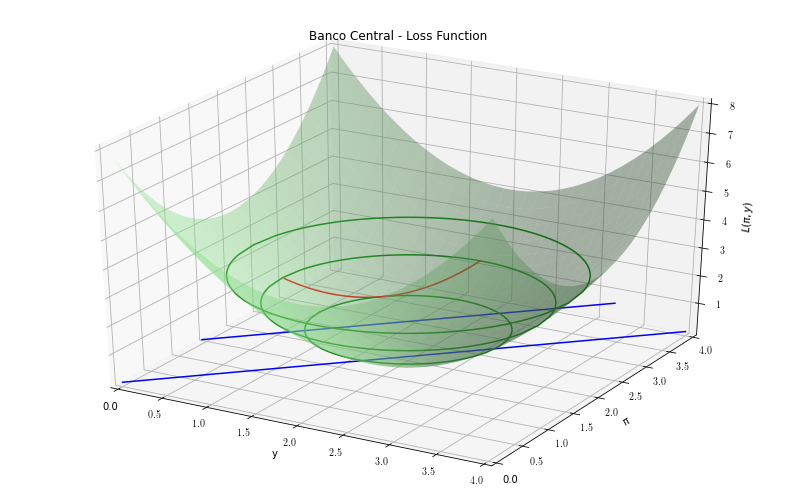

In [ ]:
a = 2
b = 2
epsilon = 0.00001
x = np.outer(np.linspace(0, 4, 32), np.ones(32))
y = x.copy().T # transpose
z = (x - a)**2 + (y - b)**2
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
# Creating color map
my_cmap = plt.get_cmap('GnBu')

# Creating plot
surf = ax.plot_surface(x, y, z,
					rstride = 1,
					cstride = 1,
					alpha = 0.4,
					color= 'lightgreen')
#ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.jet,
#linewidth=0, antialiased=True, alpha=0.2)

#cset = ax.contourf(x, y, z,
#				zdir ='z',
#				offset = np.min(z))
#fig.colorbar(surf, ax = ax,
#			shrink = 0.5,
# 	        aspect = 5)
#  Plot reta 1
x1 = np.linspace(0, 4, 100)
y1 = x1
ax.plot(x1, y1, zs=0, zdir='z', color='blue')
#  Plot reta 2
x1 = np.linspace(0, 3, 100)
y1 = x1 + np.sqrt(2)
ax.plot(x1, y1, zs=0, zdir='z', color='blue')
#  Plot reta 3
#x1 = np.linspace(0, 3, 100)
#y1 = x1 + np.sqrt(4)
#ax.plot(x1, y1, zs=0, zdir='z', color='red')
#  Plot reta 4
#x1 = np.linspace(0, 2, 100)
#y1 = x1 + np.sqrt(6)
#ax.plot(x1, y1, zs=0, zdir='z', color='red')
# plot curva de nível 1
z2 = 1
x2 = np.linspace(a - np.sqrt(z2), a + np.sqrt(z2), 100)
y2 =  np.sqrt(z2 - (x2 - a)**2) + b
y3 = -np.sqrt(z2 - (x2 - a)**2) + b
#ax.plot(x2, y2, zs=0, zdir='z', color='blue')
#ax.plot(x2, y3, zs=0, zdir='z', color='blue')
#
ax.plot(x2, y2, zs=1, zdir='z', color='green')
ax.plot(x2, y3, zs=1, zdir='z', color='green')
# plot curva de nível 2
z2 = 2
x2 = np.linspace(a - np.sqrt(z2) + epsilon, a + np.sqrt(z2), 100)
y2 =  np.sqrt(z2 - (x2 - a)**2) + b
y3 = -np.sqrt(z2 - (x2 - a)**2) + b
#ax.plot(x2, y2, zs=0, zdir='z', color='blue')
#ax.plot(x2, y3, zs=0, zdir='z', color='blue')
#
ax.plot(x2, y2, zs=2, zdir='z', color='green')
ax.plot(x2, y3, zs=2, zdir='z', color='green')
# plot curva de nível 3
z2 = 3
x2 = np.linspace(a - np.sqrt(z2) + epsilon, a + np.sqrt(z2), 100)
y2 =  np.sqrt(z2 - (x2 - a)**2) + b
y3 = -np.sqrt(z2 - (x2 - a)**2) + b
#ax.plot(x2, y2, zs=0, zdir='z', color='blue')
#ax.plot(x2, y3, zs=0, zdir='z', color='blue')
#
ax.plot(x2, y2, zs=3, zdir='z', color='green')
ax.plot(x2, y3, zs=3, zdir='z', color='green')
#
theta = np.linspace(0.6, 2.0, 100)
xc = theta
yc = xc + np.sqrt(2)
zc = (xc - a)**2 + (yc - b)**2
ax.plot(xc, yc, zc, color='red')
#surf = ax.plot_surface(x, yc, zc,
#					rstride = 1,
#					cstride = 1,
#					alpha = 0.4,
#					color= 'lightblue')
# plot curva de nível 3
#z2 = 3/2
#a = 2
#b = 2
#x4 = np.linspace(a-z2, a+z2, 100)
#y6 = np.sqrt(z2 - (x4 - a)**2) + b
#ax.plot(x4, y6, zs=0, zdir='z', color='blue')
#y7 = -np.sqrt(z2 - (x4 - a)**2) + b
#ax.plot(x4, y7, zs=0, zdir='z', color='blue')
# Adding labels
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel('y   ')
ax.set_ylabel("$\\pi$")
#ax.set_xlabel('\-axis')
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
ax.set_zlabel('$L(\pi,y)$')
ax.set_zlim(np.min(z), np.max(z))
ax.set_title('Banco Central - Loss Function')
# show plot
plt.show()

## Gráfico da inflação cartesiano tempo

Seja a equação para a regra monetária 
\begin{equation}
\begin{aligned}
y_{t}&=y_e - \alpha\beta(\pi_{t}-\pi^T)
\end{aligned}
\end{equation}
substituída na Curva de Phillips (CP)
\begin{equation}
\begin{aligned}
\pi_{t}&=\pi_{t-1}+\alpha\left(y_{t}-y_{e}\right)\\
\pi_{t}&=\pi_{t-1}+\alpha\left(y_e - \alpha\beta(\pi_{t}-\pi^T)-y_{e}\right)\\
\pi_{t}&=\pi_{t-1}-\alpha^2\beta(\pi_{t}-\pi^T)\\
\pi_{t}&=\pi_{t-1}-\alpha^2\beta\pi_{t}+\alpha^2\beta\pi^T
\end{aligned}
\end{equation}
\begin{equation}
\begin{aligned}
\pi_{t}+\alpha^2\beta\pi_{t}&=\pi_{t-1}+\alpha^2\beta\pi^T\\
(1+\alpha^2\beta)\pi_{t}&=\pi_{t-1}+\alpha^2\beta\pi^T
\end{aligned}
\end{equation}

A equação de diferenças para a inflação
\begin{equation}
\begin{aligned}
\pi_{t}&=\frac{\pi_{t-1}+\alpha^2\beta\pi^T}{(1+\alpha^2\beta)},
\end{aligned}
\end{equation}
abaixo inserimos o código onde relizamos o gráfico inflação cartesiano tempo.

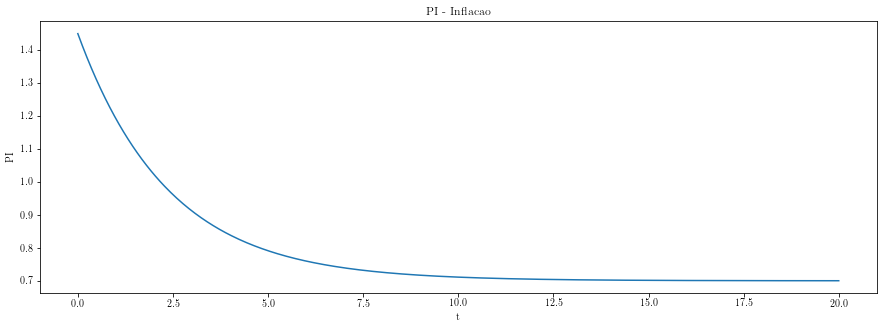

In [ ]:
alfa = 0.1
beta = 1.7
pi0  = 1.45
piT  = 0.7
def PI(pi_tmenos1, piT, alfa, beta):
    aux = 1.0 / (1 + alfa**2 * beta)
    return aux * (pi_tmenos1 + alfa**2 * beta * piT)
a = 0
b = 20
n = 500
h = (b - a) / n
t       = np.linspace(0, 0, n + 1)
pi      = np.linspace(0, 0, n + 1)
for i in range(0, n + 1):# Resumo - Modelo de três equações
	t[i] = a + i * h
pi[0] = pi0
for i in range(1, n + 1):
	pi[i] = PI(pi[i - 1], piT, alfa, beta)

plt.figure(figsize=(15,5))
plt.plot(t, pi)
plt.title('PI - Inflacao')
plt.ylabel('PI')
plt.xlabel('t')
plt.show()